In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import time
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from scipy.sparse import csr_matrix
import re
import string
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from collections import OrderedDict
from scipy.sparse import csr_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import distance

In [4]:
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
df_train = pd.read_json(r"D:\OneDrive - Queen's University\ECE\Statistical Learning\Final\train.json\train.json")
df_test = pd.read_json(r"D:\OneDrive - Queen's University\ECE\Statistical Learning\Final\test.json\test.json")

In [6]:
df_train = df_train[["id", 'ingredients', 'cuisine']].copy()

In [7]:
df_train

,id,ingredients,cuisine
0,10259,"[romaine lettuce, black olives, grape tomatoes...",greek
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...",southern_us
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",filipino
3,22213,"[water, vegetable oil, wheat, salt]",indian
4,13162,"[black pepper, shallots, cornflour, cayenne pe...",indian
...,...,...,...
39769,29109,"[light brown sugar, granulated sugar, butter, ...",irish
39770,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...",italian
39771,2238,"[eggs, citrus fruit, raisins, sourdough starte...",irish
39772,41882,"[boneless chicken skinless thigh, minced garli...",chinese


In [8]:
df_train['seperated_ingredients'] = df_train['ingredients'].apply(','.join)
df_test['seperated_ingredients'] = df_test['ingredients'].apply(','.join)

In [9]:
df_train

,id,ingredients,cuisine,seperated_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...",greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...",southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,"[water, vegetable oil, wheat, salt]",indian,"water,vegetable oil,wheat,salt"
4,13162,"[black pepper, shallots, cornflour, cayenne pe...",indian,"black pepper,shallots,cornflour,cayenne pepper..."
...,...,...,...,...
39769,29109,"[light brown sugar, granulated sugar, butter, ...",irish,"light brown sugar,granulated sugar,butter,warm..."
39770,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...",italian,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,2238,"[eggs, citrus fruit, raisins, sourdough starte...",irish,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,41882,"[boneless chicken skinless thigh, minced garli...",chinese,"boneless chicken skinless thigh,minced garlic,..."


In [10]:
"""
Provides functions for removing unwanted noise from text.
"""
# Code is inspired from Git hub repo:
# https://github.com/rfliegerallison/kaggle-whats-cooking/blob/master/What's%20Cooking%20-%20Kaggle%20Competition.ipynb
# Please note that more data cleaning has been done (modified and added more words) than the code provided above in the below
# code

character_exceptions_to_remove = ["\xae", "\xe8vre", "\u2122", "\xada", "\xadn", "¬s", "Ã£", "Ã", "£"]
phrase_exceptions = [("7 up", "sevenup"), ("sun dried", "sundried"), 
                     ("bone less", "boneless"), ("skin less", "skinless")]
deal_plural_singular = [("steaks", "steak"), ("loins", "loin"), ("inches", "inch"), ("centimeters", "centimeter"),
                          ("ounces", "ounce"), ("liters", "liter"), ("mililiters", "mililiter"), ("grams", "gram"),
                          ("cups", "cup"), ("gallons", "gallon"), ("quarts", "quart"), ("lbs", "lb"),
                          ("pounds", "pound"), ("tablespoons", "tablespoon"), ("teaspoons", "teaspoon"), 
                          ("pints", "pint"), ("fluid ounces", "fluid ounce"), ("onions", "onion"), 
                          ("cloves", "clove"), ("bulbs", "bulb"), ("peppers", "pepper"), ("breasts", "breast"),
                          ("eggs", "egg"), ("carrots", "carrot"), ("mushrooms", "mushroom"),
                          ("tortillas", "tortilla"), ("sausages", "sausage"), ("wedges", "wedge"), 
                          ("tomatoes", "tomato"), ("thighs", "thigh"), ("chilies", "chili"), ("potatoes", "potato"), 
                          ("peppercorns", "peppercorn"), ("spices", "spice"), ("chiles", "chile"), ("apples", "apple"),
                          ("legs", "leg"), ("doughs", "dough"), ("drumsticks", "drumstick")]
brandnames_to_remove = ["Lea & Perrins", "Lea and Perrin", "Lea and Perrins", "alexia", "breakstones", 
                        "kraft", "bertolli classico", "bertolli", "best foods", 
                        "betty crocker", "bisquick", "bob evans", "breyers", "curry guy", "camellia", "campbells", 
                        "country crock", "crisco", "crystal farms", "delallo", "diamond crystal", "domino", 
                        "doritos", "earth balance", "egglands best", "foster farms", "franks", "gold medal", 
                        "goya", "green giant steamers niblets", "green giant", "heinz", "hellmanns", "herdez", 
                        "hidden valley", "honeysuckle white", "jacksonville",  "jimmy dean", "johnsonville", 
                        "knorr", "krudsen", "kikkoman", "lipton", "land o lakes", "mazola", "lea and perrins", 
                        "mccormick", "meyer", "mission", "old el paso", "old bay", "pam", "pepperidge farm", 
                        "oscar mayer", "pace", "pillsbury", "progresso", "pure wesson", "pompeian", "san marzano", 
                        "sargento", "soy vay", "taco bell", "yoplait", "spice islands", "stonefire", "success", 
                        "swanson", "truvía", "uncle bens", "wish bone", "zatarains", "morton", "jameson", "tapatio", 
                        "mountain high", "philadelphia", "king arthur", "roma", "wolf brand", "tabasco"]

keywords_to_remove = ["drained and chopped", "lowfat", "light", "shredded", "sliced", "all purpose", "all natural", "natural", "original", 
                      "gourmet", "traditional", "boneless", "skinless", "fresh", "nonfat", "pitted", "quick cooking", 
                      "unbleached", "part skim", "skim", "quickcooking", "oven ready", "homemade", "instant", "small", 
                      "extra large", "large", "chopped", "grated", "cooked", "stone ground", "freshly ground", 
                      "ground", "pure", "peeled", "deveined", "organic", "cracked", "granulated", "inch thick", 
                      "extra firm", "crushed", "flakes", "self rising", "diced", "crumbles", "crumbled", 
                      "whole wheat", "whole grain", "baby", "medium", "plain", "of", "thick cut", "cubed", "coarse", 
                      "free range", "seasoned", "canned", "multipurpose", "vegan", "thawed", "squeezed", 
                      "vegetarian", "fine", "zesty", "halves", "firmly packed", "drain", "drained", "washed"]

measurements_to_remove = ["in", "inch", "cm", "centimeter", "oz", "ounce", "l", "liter", "ml", "mililiter", "g", 
                          "gram", "cup", "gallon", "quart", "lb", "pound", "tbsp", "tablespoon", "tsp", "teaspoon", 
                          "pint", "fl oz", "fluid ounce"]
phrases_to_remove = measurements_to_remove + keywords_to_remove + brandnames_to_remove
phrases_to_map = [
    (("green onion", "red onion", "purple onion", "yellow onion", "yel onion"), "onion"),
    (("collard green leaves", "collards", "collard leaves"), "collard greens"),
    ("black pepper", "pepper"),
    ("yel chives", "chives"),
    ("spinach leaves", "spinach"),
    ("tea leaves", "tea"),
    ("chile", "chili"),
    (("garlic clove", "garlic bulb"), "garlic"),
    ("uncooked", "raw"),
    (("red chili pepper", "hot chili pepper", "red hot chili pepper"), "chili pepper"),
    (("baking potato", "baked potato"), "baked potato"),
    (("sea salt", "kosher salt", "table salt", "white salt", "sea salt flakes"), "salt"),
    ("scotch whiskey", "scotch"),
    (("i cant believe its not butter spread", "i cant believe its not butter", "softened butter", "melted butter", "salted butter"), "butter"),
    (("extra virgin olive oil", "virgin olive oil"), "olive oil"),
    (("white bread", "wheat bread", "grain bread"), "bread"),
    (("white sugar", "yel sugar"), "sugar"),
    ("confectioners sugar", "powdered sugar"), 
    (("whole wheat spaghetti noodles", "whole wheat spaghettini"), "whole wheat spaghetti"),
    ("white tuna in water", "white tuna"), (("white bread slices", "white bread crumbs"), "white bread"), 
    (("whipped cream", "whipped topping", "whipping cream", "whipping heavy cream", "whipped topping"), "whipped cream"),
    ("water chestnut powder", "water chestnuts"), (("walnut halves", "walnut pieces"), "walnuts"), 
    ("waffle fries", "waffle"), ('deli ham', 'ham'), ('taco seasoning mix', 'taco seasoning'),("chees", "cheese"), ("sauc", "sauce"),
    ("paneer cheese", "paneer"), ("aleppo", "aleppo pepper"), ("all potato purpos", "potato"),
    ("Jamaican allspice", "allspice pepper"), ("allspice", "allspice pepper"),
    ("zucchini blossoms", "zucchini"), ("yukon gold", "yukon gold potatoes"), ("yellowfin", "yellowfin tuna"),
    ("yellow summer squash", "yellow squash"), ("yellow mustard seeds", "yellow mustard"),
    ("whole wheat tortilla wraps", "whole wheat tortilla"), ("vermicelli noodles", "vermicelli"), ("veggies", "vegetables"),
    (("vegetable oil cooking spray", "vegetable oil spray"), "vegetable oil"), 
    (("vegetable soup", "vegetable stock", "vegetable stock powder", "vegetable slaw"), "vegetable broth"), 
    (("vanilla essence", "vanilla flavoring", "vanilla"), "vanilla extract"), ("vanilla bean", "vanilla beans"),
    ("urad dal split", "urad dal"), (("original converted brand rice", "ready rice whole grain brown rice"), "rice"),
    ("turnip greens", "turnips"), ("turmeric root", "tumeric"), (("tortilla wraps", "tortilla shells"), "tortillas"), 
    (("tortelloni", "tortellini, cook and drain"), "tortellini"), ("top sirloin steak", "top sirloin"),
    (("thyme", "thyme leaves", "thyme sprig", "thyme sprigs"), "thyme"), ("spinach leaves", "spinach"), 
    (("spaghetti squash","spaghetti, cook and drain", "spaghettini"), "spaghetti"), ("sliced mushrooms", "mushrooms"), 
    (("sesame", "sesame paste", "sesame seed paste", "toasted sesame seeds", "roasted sesame seeds"), "sesame seeds"), 
    (("dark sesame oil", "toasted sesame oil"), "sesame oil"), ("serrano chilies", "serrano chile"), 
    ("scallion greens", "scallions"), (("saffron powder", "saffron threads"), "saffron")]


replace_punc_space = re.compile(r"[-,]")
remove_percentage_less = re.compile(r"[\d+]% less [A-z]*")
remove_percentage_reduced = re.compile(r"[\d+]% reduced [A-z]*")
remove_special_char = re.compile(r"[!\\/%.'®™Ã£Âº©¢â€žÂ¢â„¢¨â‚¬§]")
remove_digits = re.compile(r"\d+")
replace_symbols_and = re.compile(r"[&+]")
remove_parantheses_content = re.compile(r"\([^)]*\)")
remove_betweeen_no_added = re.compile(r"no [A-z]* added")
reove_reduced_word = re.compile(r"reduced [A-z]*")
remove_low_and_following_word = re.compile(r"low [A-z]*")
remove_less_and_following_word = re.compile(r"less [A-z]*")
remove_free_and_previous_word = re.compile(r"[A-z]* free")
trim_multi_spaces = re.compile(r" +")

In [11]:
# Code is inspired from Git hub repo:
# https://github.com/rfliegerallison/kaggle-whats-cooking/blob/master/What's%20Cooking%20-%20Kaggle%20Competition.ipynb
# Please note that the code has been modified as per the requirement. 

def clean_column(ingredient):
    
    ingredient = ingredient.lower()
    ingredient = replace_punc_space.sub(" ", ingredient)
    
    # Map certain exceptions that we don't want whiped out by later cleaning processes.
    for character_exception in character_exceptions_to_remove:
        ingredient = re.sub(character_exception, "", ingredient)
    for phrase_exception, replacement in phrase_exceptions:
        ingredient = re.sub(r"\b{}\b".format(phrase_exception), replacement, ingredient)
        
    ingredient = remove_percentage_less.sub("", ingredient)
    ingredient = remove_percentage_reduced.sub("", ingredient)
    ingredient = remove_special_char.sub("", ingredient)
    ingredient = remove_digits.sub("", ingredient)
    ingredient = replace_symbols_and.sub(" and ", ingredient)
    ingredient = remove_parantheses_content.sub(" ", ingredient)
    ingredient = remove_betweeen_no_added.sub("", ingredient)
    ingredient = reove_reduced_word.sub("", ingredient)
    ingredient = remove_low_and_following_word.sub("", ingredient)
    ingredient = remove_less_and_following_word.sub("", ingredient)
    ingredient = remove_free_and_previous_word.sub("", ingredient)
    ingredient = trim_multi_spaces.sub(" ", ingredient)

    for plural, singular in deal_plural_singular:
        ingredient = re.sub(r"\b{}\b".format(plural), singular, ingredient)

    for phrase in phrases_to_remove:
        ingredient = re.sub(r"\b{}\b".format(phrase), "", ingredient)
    
    for pattern, replacement in phrases_to_map:
        if type(pattern) is tuple:
            for val in pattern:
                ingredient = re.sub(r"\b{}\b".format(val), replacement, ingredient)
        elif type(pattern) is str:
            ingredient = re.sub(r"\b{}\b".format(pattern), replacement, ingredient)
    
    ingredient = trim_multi_spaces.sub(" ", ingredient)
    ingredient = ingredient.strip()
    return ingredient

def clean_recipe(recipe):
    recipe = list(map(clean_column, recipe))
    recipe = [ingredient for ingredient in recipe if len(ingredient) > 0]
    return recipe

def clean_raw_data(raw_data):
    clean_data = raw_data['ingredients'].apply(clean_recipe)
    return clean_data

In [12]:
# Cleaning the train dataset

train = clean_raw_data(df_train)


Time spent cleaning: 3.395 min.


In [13]:
df_train['ingredients'] = train
df_train

,id,ingredients,cuisine,seperated_ingredients
0,10259,"[romaine lettuce, black olives, grape tomato, ...",greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,"[flour, pepper, salt, tomato, pepper, thyme, e...",southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,"[egg, pepper, salt, mayonaise, cooking oil, gr...",filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,"[water, vegetable oil, wheat, salt]",indian,"water,vegetable oil,wheat,salt"
4,13162,"[pepper, shallots, cornflour, cayenne pepper, ...",indian,"black pepper,shallots,cornflour,cayenne pepper..."
...,...,...,...,...
39769,29109,"[brown sugar, sugar, butter, warm water, egg, ...",irish,"light brown sugar,granulated sugar,butter,warm..."
39770,11462,"[italian dressing, onion, broccoli florets, ro...",italian,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,2238,"[egg, citrus fruit, raisins, sourdough starter...",irish,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,41882,"[bone skin, minced garlic, steamed white rice,...",chinese,"boneless chicken skinless thigh,minced garlic,..."


In [14]:
df_train.to_csv(r'train_ingredients_1.csv', index = False)

In [15]:
df_train = pd.read_csv(r'train_ingredients_1.csv')
df_train

,id,ingredients,cuisine,seperated_ingredients
0,10259,"['romaine lettuce', 'black olives', 'grape tom...",greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,"['flour', 'pepper', 'salt', 'tomato', 'pepper'...",southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,"['egg', 'pepper', 'salt', 'mayonaise', 'cookin...",filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,"['water', 'vegetable oil', 'wheat', 'salt']",indian,"water,vegetable oil,wheat,salt"
4,13162,"['pepper', 'shallots', 'cornflour', 'cayenne p...",indian,"black pepper,shallots,cornflour,cayenne pepper..."
...,...,...,...,...
39769,29109,"['brown sugar', 'sugar', 'butter', 'warm water...",irish,"light brown sugar,granulated sugar,butter,warm..."
39770,11462,"['italian dressing', 'onion', 'broccoli floret...",italian,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,2238,"['egg', 'citrus fruit', 'raisins', 'sourdough ...",irish,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,41882,"['bone skin', 'minced garlic', 'steamed white ...",chinese,"boneless chicken skinless thigh,minced garlic,..."


In [16]:
# converting string of ingredients back to list
def conv_str_list(ingredients):
    res = ast.literal_eval(ingredients)
    return res

In [17]:
df_train['ingredients'] = df_train['ingredients'].apply(conv_str_list).copy()
df_train

,id,ingredients,cuisine,seperated_ingredients
0,10259,"[romaine lettuce, black olives, grape tomato, ...",greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,"[flour, pepper, salt, tomato, pepper, thyme, e...",southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,"[egg, pepper, salt, mayonaise, cooking oil, gr...",filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,"[water, vegetable oil, wheat, salt]",indian,"water,vegetable oil,wheat,salt"
4,13162,"[pepper, shallots, cornflour, cayenne pepper, ...",indian,"black pepper,shallots,cornflour,cayenne pepper..."
...,...,...,...,...
39769,29109,"[brown sugar, sugar, butter, warm water, egg, ...",irish,"light brown sugar,granulated sugar,butter,warm..."
39770,11462,"[italian dressing, onion, broccoli florets, ro...",italian,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,2238,"[egg, citrus fruit, raisins, sourdough starter...",irish,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,41882,"[bone skin, minced garlic, steamed white rice,...",chinese,"boneless chicken skinless thigh,minced garlic,..."


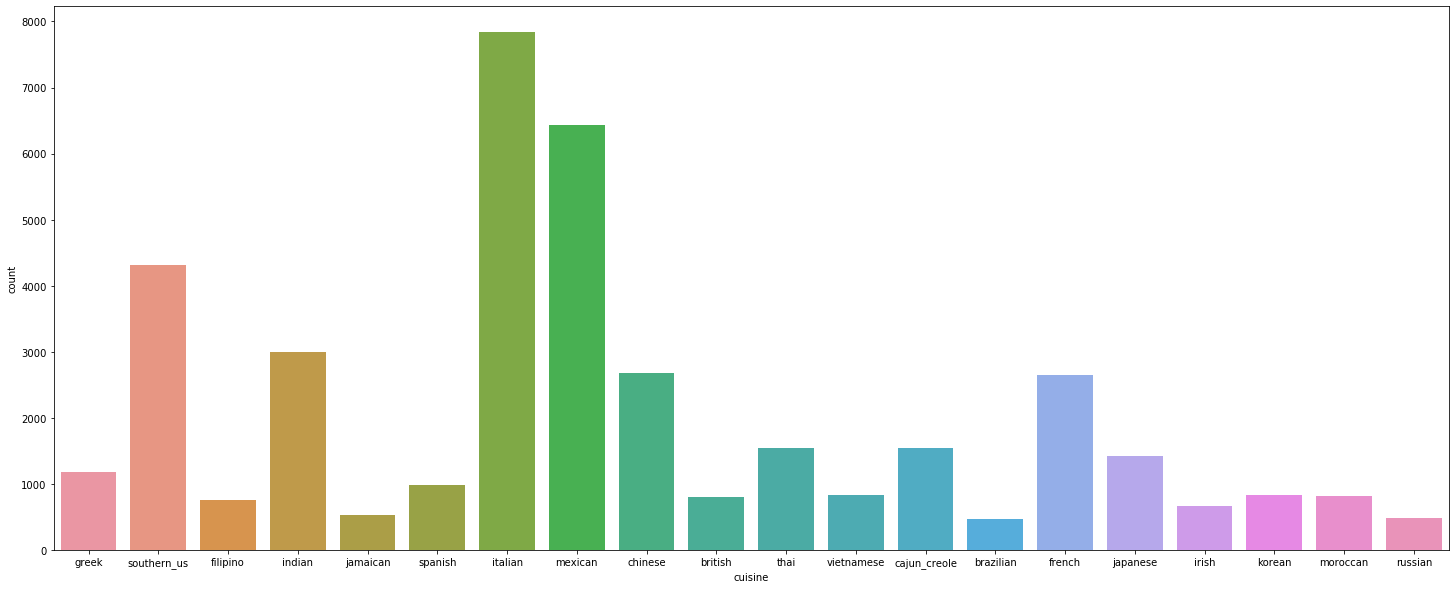

In [18]:
fig, ax1 = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x=df_train['cuisine'])

In [20]:
def word_dict():
    ingre_dt = {}
    for row in range(len(df_train)):
        for inc in range(len(df_train['ingredients'].values[row])):
            if df_train['ingredients'].values[row][inc] not in ingre_dt:
                ingre_dt[df_train['ingredients'].values[row][inc]] = 1
            else:
                ingre_dt[df_train['ingredients'].values[row][inc]] = ingre_dt[df_train['ingredients'].values[row][inc]] + 1
    return ingre_dt

In [21]:
wrd_dict = word_dict()

In [22]:
wrd_dict

{'romaine lettuce': 270,
 'black olives': 437,
 'grape tomato': 228,
 'garlic': 15008,
 'pepper': 13649,
 'onion': 14993,
 'seasoning': 241,
 'garbanzo beans': 150,
 'feta cheese': 626,
 'flour': 6748,
 'salt': 23223,
 'tomato': 6043,
 'thyme': 1560,
 'egg': 6429,
 'green tomato': 108,
 'yel meal': 341,
 'milk': 2882,
 'vegetable oil': 4730,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chili': 1250,
 'grilled chicken breast': 5,
 'garlic powder': 1442,
 'yel': 1506,
 'soy sauce': 4258,
 'butter': 5299,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 27,
 'shallots': 1499,
 'cornflour': 103,
 'cayenne pepper': 1662,
 'garlic paste': 282,
 'lemon juice': 3084,
 'chili powder': 2157,
 'passata': 24,
 'oil': 1970,
 'cumin': 3702,
 'bone skin': 343,
 'garam masala': 925,
 'double cream': 40,
 'yogurt': 644,
 'bay leaf': 839,
 'sugar': 8430,
 'ginger root': 461,
 'cinnamon': 1927,
 'vanilla extract extract': 1486,
 'ginger': 4520,
 'powdered sugar': 897,
 'baking powder': 1739,
 'olive o

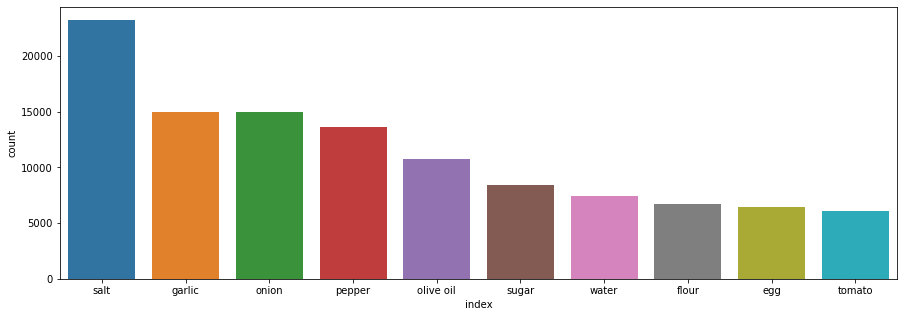

In [23]:
# plotting top ten ingredients in all cuisines

wrd_plot = pd.DataFrame.from_dict(wrd_dict, orient = 'index', columns=['count']).reset_index()
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 5)

sns.barplot(x='index', y = 'count', data=wrd_plot.sort_values(by=['count'], ascending=False)[:10], ax = ax1)

In [24]:
unique_ingredients_list = []
for k,v in wrd_dict.items():
    unique_ingredients_list.append(k)
    
print(unique_ingredients_list)

['romaine lettuce', 'black olives', 'grape tomato', 'garlic', 'pepper', 'onion', 'seasoning', 'garbanzo beans', 'feta cheese', 'flour', 'salt', 'tomato', 'thyme', 'egg', 'green tomato', 'yel meal', 'milk', 'vegetable oil', 'mayonaise', 'cooking oil', 'green chili', 'grilled chicken breast', 'garlic powder', 'yel', 'soy sauce', 'butter', 'chicken livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne pepper', 'garlic paste', 'lemon juice', 'chili powder', 'passata', 'oil', 'cumin', 'bone skin', 'garam masala', 'double cream', 'yogurt', 'bay leaf', 'sugar', 'ginger root', 'cinnamon', 'vanilla extract extract', 'ginger', 'powdered sugar', 'baking powder', 'olive oil', 'shrimp', 'cilantro', 'jalapeno chili', 'flat leaf parsley', 'skirt steak', 'white vinegar', 'chorizo sausage', 'pistachio nuts', 'white almond bark', 'almond extract', 'dried cranberries', 'pineapple', 'pork', 'poblano pepper', 'corn tortilla', 'cheddar cheese', 'iceberg lettuce', 'lime', 'basil', 'pimentos', 'sweet p

In [25]:
len(unique_ingredients_list)

5577

In [26]:
#creating the countvectorizer that does not split the words on the basis of 'space'

def my_vectorizer(data_with_col_ingredients):

    stopchar = '|'

    recipe_matrix_in_strings = [stopchar.join(df) for df in data_with_col_ingredients]

    vectorizer = CountVectorizer(binary=True, vocabulary=unique_ingredients_list, token_pattern='[^|]+')
    
    recipe_matrix = vectorizer.fit_transform(recipe_matrix_in_strings).toarray()
    
    return recipe_matrix

In [27]:
# Transform it.
vectorized_matrix = my_vectorizer(df_train['ingredients'])

print("Matrix representation: \n{}".format(vectorized_matrix))

Matrix representation: 
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
vectorized_matrix.shape

(39774, 5577)

In [ ]:
sparse_matrix = csr_matrix(vectorized_matrix, dtype=np.bool)

sparse_matrix

In [32]:
print(sparse_matrix)

  (0, 0)	True
  (0, 1)	True
  (0, 2)	True
  (0, 3)	True
  (0, 4)	True
  (0, 5)	True
  (0, 6)	True
  (0, 7)	True
  (0, 8)	True
  (1, 4)	True
  (1, 9)	True
  (1, 10)	True
  (1, 11)	True
  (1, 12)	True
  (1, 13)	True
  (1, 14)	True
  (1, 15)	True
  (1, 16)	True
  (1, 17)	True
  (2, 4)	True
  (2, 10)	True
  (2, 13)	True
  (2, 18)	True
  (2, 19)	True
  (2, 20)	True
  :	:
  (39772, 84)	True
  (39772, 87)	True
  (39772, 136)	True
  (39772, 138)	True
  (39772, 150)	True
  (39772, 151)	True
  (39772, 257)	True
  (39772, 410)	True
  (39772, 448)	True
  (39772, 773)	True
  (39772, 837)	True
  (39772, 2223)	True
  (39772, 2960)	True
  (39773, 3)	True
  (39773, 4)	True
  (39773, 5)	True
  (39773, 10)	True
  (39773, 11)	True
  (39773, 20)	True
  (39773, 43)	True
  (39773, 52)	True
  (39773, 53)	True
  (39773, 72)	True
  (39773, 161)	True
  (39773, 177)	True


In [35]:
df_train

,id,ingredients,cuisine,seperated_ingredients
0,10259,"[romaine lettuce, black olives, grape tomato, ...",greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,"[flour, pepper, salt, tomato, pepper, thyme, e...",southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,"[egg, pepper, salt, mayonaise, cooking oil, gr...",filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,"[water, vegetable oil, wheat, salt]",indian,"water,vegetable oil,wheat,salt"
4,13162,"[pepper, shallots, cornflour, cayenne pepper, ...",indian,"black pepper,shallots,cornflour,cayenne pepper..."
...,...,...,...,...
39769,29109,"[brown sugar, sugar, butter, warm water, egg, ...",irish,"light brown sugar,granulated sugar,butter,warm..."
39770,11462,"[italian dressing, onion, broccoli florets, ro...",italian,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,2238,"[egg, citrus fruit, raisins, sourdough starter...",irish,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,41882,"[bone skin, minced garlic, steamed white rice,...",chinese,"boneless chicken skinless thigh,minced garlic,..."


In [38]:
from sklearn.model_selection import KFold

# Defining functions for model training
all_cuisines = np.array(df_train['cuisine'])
cuisine_labels = np.array(df_train['cuisine'])

n_feat = sparse_matrix.shape[1]
n_targets = len(set(cuisine_labels))

# Code is inspired from the git hub repository given below
# https://github.com/rfliegerallison/kaggle-whats-cooking/blob/master/What's%20Cooking%20-%20Kaggle%20Competition.ipynb

def kfold_fit(data_matrix, labels, classifier, n_folds=3):
    
    (num_rows, num_cols) = np.shape(data_matrix)
    kf = KFold(n_splits=5)

    for train, test in kf.split(data_matrix):

        data_train = data_matrix[train]
        data_test = data_matrix[test]
        labels_train = labels[train]
        labels_test = labels[test]

    classifier.fit(data_train, labels_train)
    return classifier


def evaluate(classifier, sample_size=39774):
    sample_indices = np.random.choice(len(all_cuisines), sample_size)
    y_true = all_cuisines[sample_indices]
    y_pred = classifier.predict(sparse_matrix[sample_indices])
    accuracy = metrics.accuracy_score(y_true, y_pred)    
    return accuracy

In [ ]:
# Predicting on train dataset with KNN
knn_classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, metric='minkowski'), n_jobs=-1)

knn = kfold_fit(sparse_matrix, cuisine_labels, knn_classifier)

In [ ]:
knn_accuracy = evaluate(knn, sample_size=1000)
print(knn_accuracy)

In [45]:
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier())
dt = kfold_fit(sparse_matrix, cuisine_labels, dt_classifier)
print(dt)


Time spent fitting model: 0.480 min.
OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best'),
     

In [46]:
dt_accuracy = evaluate(dt)
print(dt_accuracy)


Time spent making predictions: 0.007 min.
0.9175843515864636


In [47]:
rf_classifier = RandomForestClassifier()
rf = kfold_fit(sparse_matrix, cuisine_labels, rf_classifier)
print(rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Time spent fitting model: 0.135 min.
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [48]:
rf_accuracy = evaluate(rf)
print(rf_accuracy)


Time spent making predictions: 0.006 min.
0.9318650374616584


## Test Data Cleaning

In [49]:
# A global variable listing all known ingredients, sorted by increasing length.

# Code is inspired from the git hub repository given below
# https://github.com/rfliegerallison/kaggle-whats-cooking/blob/master/What's%20Cooking%20-%20Kaggle%20Competition.ipynb

known_ingredients = sorted(unique_ingredients_list, key=len)


def find_closest_known_ingredient(ingredient):
    """
    Returns the "closest" known ingredient to the existing ingredient.
    """
    for known_ingredient in known_ingredients:
        if ingredient in known_ingredient:
            return known_ingredient
    
    for known_ingredient in reversed(known_ingredients):
        if known_ingredient in ingredient:
            return known_ingredient
        
    max_jaccard_dist = 0
    closest_known_ingredient = known_ingredients[0]

    for known_ingredient in known_ingredients:
        dist = distance.jaccard(ingredient, known_ingredient)
        if dist > max_jaccard_dist:
            closest_known_ingredient = known_ingredient
            max_jaccard_dist = dist
            
    return closest_known_ingredient

def match_new_ingredients_and_clean_recipe(recipe):
    """
    Cleans all the ingredients and replaces novel ingredients in test instances 
    with the "closest" known ingredients.
    """

    recipe = list(map(clean_column, recipe))
    recipe = [ingredient for ingredient in recipe if len(ingredient) > 0]
    recipe = [find_closest_known_ingredient(ingredient) if ingredient not in known_ingredients else ingredient for ingredient in recipe]

    return recipe

def clean_test_data(test_data):
    clean_data = test_data['ingredients'].apply(match_new_ingredients_and_clean_recipe)
    return clean_data

In [50]:
test = clean_test_data(df_test)


Time spent cleaning: 1.075 min.


In [51]:
test

0       [baking powder, egg, flour, raisins, milk, sugar]
1       [sugar, egg yolks, corn starch, cream tartar, ...
2       [sausage links, fennel bulb, fronds, olive oil...
3       [meat cuts, file powder, smoked sausage, okra,...
4       [pepper, salt, sausage casings, leeks, parmigi...
                              ...                        
9939    [egg yolks, lemon juice, sugar, bourbon whiske...
9940    [hot sauce, butter, sweet potato, adobo sauce,...
9941    [pepper, salt, parmigiano reggiano cheese, ric...
9942    [cheddar cheese, cayenne, paprika, plum tomato...
9943    [cold water, olive oil, lime wedge, garlic, bo...
Name: ingredients, Length: 9944, dtype: object

In [52]:
df_test['ingredients'] = test
df_test

,id,ingredients,seperated_ingredients
0,18009,"[baking powder, egg, flour, raisins, milk, sugar]","baking powder,eggs,all-purpose flour,raisins,m..."
1,28583,"[sugar, egg yolks, corn starch, cream tartar, ...","sugar,egg yolks,corn starch,cream of tartar,ba..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links,fennel bulb,fronds,olive oil,cub..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts,file powder,smoked sausage,okra,shri..."
4,35687,"[pepper, salt, sausage casings, leeks, parmigi...","ground black pepper,salt,sausage casings,leeks..."
...,...,...,...
9939,30246,"[egg yolks, lemon juice, sugar, bourbon whiske...","large egg yolks,fresh lemon juice,sugar,bourbo..."
9940,36028,"[hot sauce, butter, sweet potato, adobo sauce,...","hot sauce,butter,sweet potatoes,adobo sauce,salt"
9941,22339,"[pepper, salt, parmigiano reggiano cheese, ric...","black pepper,salt,parmigiano reggiano cheese,r..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...","cheddar cheese,cayenne,paprika,plum tomatoes,g..."


In [53]:
df_test.to_csv(r'test_ingredients_1.csv', index = False)

In [54]:
df_test = pd.read_csv(r'test_ingredients_1.csv')

In [55]:
df_test['ingredients'] = df_test['ingredients'].apply(conv_str_list).copy()

df_test

,id,ingredients,seperated_ingredients
0,18009,"[baking powder, egg, flour, raisins, milk, sugar]","baking powder,eggs,all-purpose flour,raisins,m..."
1,28583,"[sugar, egg yolks, corn starch, cream tartar, ...","sugar,egg yolks,corn starch,cream of tartar,ba..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links,fennel bulb,fronds,olive oil,cub..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts,file powder,smoked sausage,okra,shri..."
4,35687,"[pepper, salt, sausage casings, leeks, parmigi...","ground black pepper,salt,sausage casings,leeks..."
...,...,...,...
9939,30246,"[egg yolks, lemon juice, sugar, bourbon whiske...","large egg yolks,fresh lemon juice,sugar,bourbo..."
9940,36028,"[hot sauce, butter, sweet potato, adobo sauce,...","hot sauce,butter,sweet potatoes,adobo sauce,salt"
9941,22339,"[pepper, salt, parmigiano reggiano cheese, ric...","black pepper,salt,parmigiano reggiano cheese,r..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...","cheddar cheese,cayenne,paprika,plum tomatoes,g..."


In [56]:
def word_dict_test():
    ingre_dt = {}
    for row in range(len(df_test)):
        for inc in range(len(df_test['ingredients'].values[row])):
            if df_test['ingredients'].values[row][inc] not in ingre_dt:
                ingre_dt[df_test['ingredients'].values[row][inc]] = 1
            else:
                ingre_dt[df_test['ingredients'].values[row][inc]] = ingre_dt[df_test['ingredients'].values[row][inc]] + 1
    return ingre_dt

In [57]:
test_word_dict = word_dict_test()

test_word_dict

{'baking powder': 430,
 'egg': 1644,
 'flour': 1730,
 'raisins': 135,
 'milk': 744,
 'sugar': 2154,
 'egg yolks': 287,
 'corn starch': 473,
 'cream tartar': 44,
 'bananas': 59,
 'vanilla extract wafers': 15,
 'vanilla extract extract': 372,
 'toasted pecans': 9,
 'egg whites': 242,
 'rum': 24,
 'sausage links': 16,
 'fennel bulb': 56,
 'fronds': 9,
 'olive oil': 2607,
 'cuban pepper': 3,
 'onion': 3780,
 'meat cuts': 2,
 'file powder': 18,
 'smoked sausage': 45,
 'okra': 68,
 'shrimp': 484,
 'andouille sausage': 54,
 'water': 1836,
 'paprika': 342,
 'hot sauce': 177,
 'garlic': 3692,
 'browning': 4,
 'lump crab meat': 24,
 'vegetable oil': 1218,
 'pepper': 3402,
 'flat leaf parsley': 264,
 'bone skin': 102,
 'dried thyme': 223,
 'white rice': 99,
 'yel': 380,
 'ham': 99,
 'salt': 5810,
 'sausage casings': 25,
 'leeks': 121,
 'parmigiano reggiano cheese': 99,
 'cornmeal': 105,
 'peach slices': 9,
 'heavy cream': 320,
 'lemon juice': 778,
 'unsalted butter': 693,
 'grape juice': 3,
 'ora

In [58]:
test_unique_ingredients_list = []
for k,v in test_word_dict.items():
    test_unique_ingredients_list.append(k)
    
print(test_unique_ingredients_list)

['baking powder', 'egg', 'flour', 'raisins', 'milk', 'sugar', 'egg yolks', 'corn starch', 'cream tartar', 'bananas', 'vanilla extract wafers', 'vanilla extract extract', 'toasted pecans', 'egg whites', 'rum', 'sausage links', 'fennel bulb', 'fronds', 'olive oil', 'cuban pepper', 'onion', 'meat cuts', 'file powder', 'smoked sausage', 'okra', 'shrimp', 'andouille sausage', 'water', 'paprika', 'hot sauce', 'garlic', 'browning', 'lump crab meat', 'vegetable oil', 'pepper', 'flat leaf parsley', 'bone skin', 'dried thyme', 'white rice', 'yel', 'ham', 'salt', 'sausage casings', 'leeks', 'parmigiano reggiano cheese', 'cornmeal', 'peach slices', 'heavy cream', 'lemon juice', 'unsalted butter', 'grape juice', 'orange', 'white zinfandel', 'ginger', 'white pepper', 'orange juice', 'sriracha', 'orange zest', 'chicken broth', 'sesame seeds seeds', 'bone chicken breast', 'white vinegar', 'soy sauce', 'taco seasoning', 'cilantro', 'cumin', 'cinnamon', 'bittersweet chocolate', 'hot chili powder', 'mont

In [59]:
def my_test_vectorizer(data_with_col_ingredients):

    stopchar = '|'

    recipe_matrix_in_strings = [stopchar.join(df) for df in data_with_col_ingredients]

    vectorizer = CountVectorizer(binary=True, vocabulary=unique_ingredients_list, token_pattern='[^|]+')
    
    recipe_matrix = vectorizer.fit_transform(recipe_matrix_in_strings).toarray()
    
    return recipe_matrix

In [60]:
test_vectorized_matrix = my_test_vectorizer(df_test['ingredients'])

test_sparse_matrix = csr_matrix(test_vectorized_matrix, dtype=np.bool)

test_sparse_matrix

<9944x5577 sparse matrix of type '<class 'numpy.bool_'>'
	with 106611 stored elements in Compressed Sparse Row format>

In [62]:
print(test_sparse_matrix)

  (0, 9)	True
  (0, 13)	True
  (0, 16)	True
  (0, 43)	True
  (0, 49)	True
  (0, 416)	True
  (1, 16)	True
  (1, 43)	True
  (1, 46)	True
  (1, 87)	True
  (1, 302)	True
  (1, 306)	True
  (1, 374)	True
  (1, 448)	True
  (1, 635)	True
  (1, 1122)	True
  (1, 1450)	True
  (2, 5)	True
  (2, 50)	True
  (2, 235)	True
  (2, 1432)	True
  (2, 2248)	True
  (2, 2350)	True
  (3, 3)	True
  (3, 4)	True
  :	:
  (9942, 120)	True
  (9942, 154)	True
  (9942, 161)	True
  (9942, 222)	True
  (9942, 252)	True
  (9942, 336)	True
  (9942, 1064)	True
  (9943, 3)	True
  (9943, 11)	True
  (9943, 37)	True
  (9943, 38)	True
  (9943, 50)	True
  (9943, 65)	True
  (9943, 169)	True
  (9943, 183)	True
  (9943, 267)	True
  (9943, 275)	True
  (9943, 391)	True
  (9943, 393)	True
  (9943, 470)	True
  (9943, 604)	True
  (9943, 741)	True
  (9943, 1055)	True
  (9943, 1213)	True
  (9943, 1358)	True


In [63]:
predicted_cuisines = rf.predict(test_sparse_matrix)


Time spent making predictions: 0.001 min.


In [64]:
predicted_cuisines

array(['italian', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

In [65]:
df_test['cuisine'] = predicted_cuisines

In [66]:
df_test

,id,ingredients,seperated_ingredients,cuisine
0,18009,"[baking powder, egg, flour, raisins, milk, sugar]","baking powder,eggs,all-purpose flour,raisins,m...",italian
1,28583,"[sugar, egg yolks, corn starch, cream tartar, ...","sugar,egg yolks,corn starch,cream of tartar,ba...",southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links,fennel bulb,fronds,olive oil,cub...",italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts,file powder,smoked sausage,okra,shri...",cajun_creole
4,35687,"[pepper, salt, sausage casings, leeks, parmigi...","ground black pepper,salt,sausage casings,leeks...",italian
...,...,...,...,...
9939,30246,"[egg yolks, lemon juice, sugar, bourbon whiske...","large egg yolks,fresh lemon juice,sugar,bourbo...",southern_us
9940,36028,"[hot sauce, butter, sweet potato, adobo sauce,...","hot sauce,butter,sweet potatoes,adobo sauce,salt",southern_us
9941,22339,"[pepper, salt, parmigiano reggiano cheese, ric...","black pepper,salt,parmigiano reggiano cheese,r...",italian
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...","cheddar cheese,cayenne,paprika,plum tomatoes,g...",southern_us


In [61]:
submit_1 = df_test[['id', 'cuisine']].copy()
submit_1.to_csv(r'submit_1.csv', index=False) # kaggle score of ~0.69

In [113]:
# fine tuning the hyperparameters of random forest

rf_grid = RandomForestClassifier(random_state=123)

n_estimators = [200, 400, 600, 1000, 1200]

# number of features at every split
min_samples_split = [2, 5, 10, 12, 14]
min_samples_leaf = [1, 2, 5, 10, 15]
max_depth = [10, 12, 15, 18, 20, 25, 50]
max_depth.append(None)
# create random grid

random_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                verbose=2, n_jobs = -1)

# Fit the model
rf_grid_params = rfc_random.fit(sparse_matrix, cuisine_labels)

print(rf_grid_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [114]:
print(rf_grid_params.best_params_)
# minimum split came to be 1200 (max value in grid), so lets increase it with others fixed

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25}


In [ ]:
# Crashed!!
# still doesn't work. Need more computational power
rf_grid = RandomForestClassifier(random_state=123)

n_estimators = [1200, 1250]

# number of features at every split
min_samples_split = [5]
min_samples_leaf = [1]
max_depth = [25]
max_depth.append(None)
# create random grid

random_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = -1)

# Fit the model
rf_grid_params_1 = rfc_random.fit(sparse_matrix, cuisine_labels)

print(rf_grid_params_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [67]:
best_params = {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25, 'n_jobs': -1, 
               'max_features': 'auto'}

rf_grid_bestparams = RandomForestClassifier(**best_params)

rf_best = rf_grid_bestparams.fit(sparse_matrix, cuisine_labels)

In [68]:
rf_best_pred = rf_grid_bestparams.predict(test_sparse_matrix)

df_test['cuisine'] = rf_best_pred

In [69]:
submit_2 = df_test[['id', 'cuisine']].copy()

submit_2.to_csv(r'submit_2.csv', index=False) # Kaggle Score 0.58628! 
# Strange, accuracy decrease after running the grid search!